<center>

# Program No. 1
</center>

### <strong> Objective: </strong> Design a single unit perceptron for classification of a linearly separable binary dataset without using pre-defined models.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
# Load the loan approval dataset
df = pd.read_csv('loan_approval_dataset.csv')

# Simulate credit score if not present
if 'credit_score' not in df.columns:
    np.random.seed(42)
    df['credit_score'] = np.random.randint(300, 850, size=len(df))

print("Modified Loan Approval Prediction Model")
print("=" * 40)
print(f"Dataset shape: {df.shape}")
print("\nSample data:")
print(df.head())

Modified Loan Approval Prediction Model
Dataset shape: (39, 4)

Sample data:
   annual_income  debt_to_income_ratio  loan_approved  credit_score
0          41.08                 37.29            0.0           402
1          47.85                 37.53            0.0           735
2          57.57                 39.43            0.0           570
3          41.59                 44.01            0.0           406
4          33.20                 38.66            0.0           371


In [5]:
# Extract features and target
X = df[['annual_income', 'debt_to_income_ratio', 'credit_score']].values
y = df['loan_approved'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Train perceptron model with modified settings
perceptron = Perceptron(max_iter=1200, tol=1e-4, eta0=0.15, random_state=21)
perceptron.fit(X_train_scaled, y_train)
y_pred = perceptron.predict(X_test_scaled)

In [7]:
# Evaluation metrics
print("\n--- Evaluation Results ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Details:")
print(classification_report(y_test, y_pred))


--- Evaluation Results ---
Test Accuracy: 90.00%

Confusion Matrix:
[[6 1]
 [0 3]]

Classification Details:
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92         7
         1.0       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



In [8]:
# Model parameters
weights = perceptron.coef_[0]
bias = perceptron.intercept_[0]
print("\nLearned Parameters:")
print(f"Weights: {weights}")
print(f"Bias: {bias:.4f}")


Learned Parameters:
Weights: [ 0.5195471  -0.1426027   0.02581748]
Bias: 0.3000


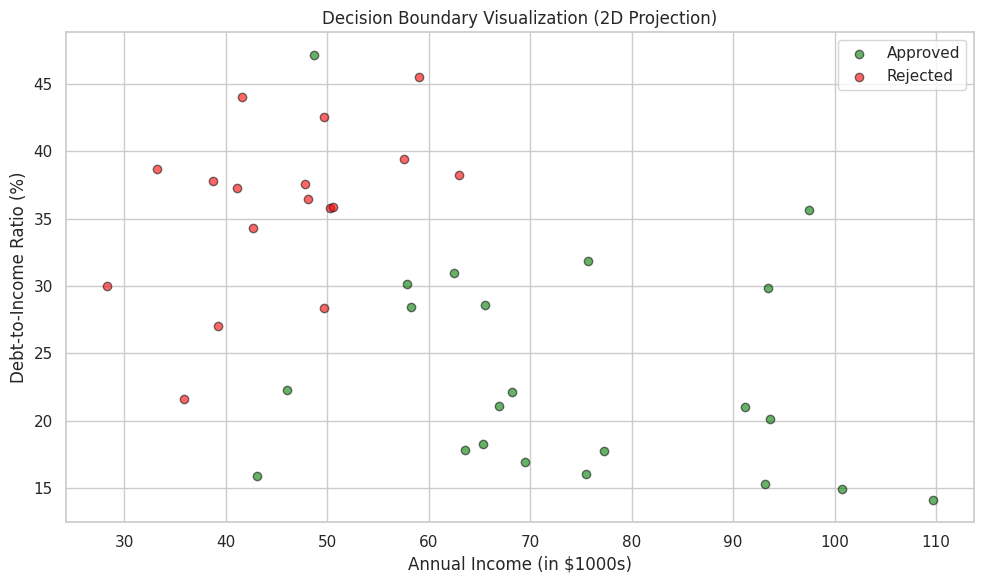

In [9]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

approved = df[df['loan_approved'] == 1]
rejected = df[df['loan_approved'] == 0]

plt.scatter(approved['annual_income'], approved['debt_to_income_ratio'],
            c='green', label='Approved', alpha=0.6, edgecolor='k')
plt.scatter(rejected['annual_income'], rejected['debt_to_income_ratio'],
            c='red', label='Rejected', alpha=0.6, edgecolor='k')

plt.xlabel('Annual Income (in $1000s)')
plt.ylabel('Debt-to-Income Ratio (%)')
plt.title('Decision Boundary Visualization (2D Projection)')
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
def predict_new_applicant(income, debt_ratio, credit_score):
    new_data = np.array([[income, debt_ratio, credit_score]])
    new_data_scaled = scaler.transform(new_data)
    prediction = perceptron.predict(new_data_scaled)[0]
    score = np.dot(new_data_scaled, weights.T) + bias
    confidence = 1 / (1 + np.exp(-score[0]))
    return int(prediction), confidence


print("\n-- Predict Loan Status for New Applicant --")
income = int(input("Enter income ($1000s): "))
debt_ratio = int(input("Enter debt-to-income ratio (%): "))
credit_score = int(input("Enter credit score (300-850): "))

status, conf = predict_new_applicant(income, debt_ratio, credit_score)
label = 'APPROVED' if status == 1 else 'REJECTED'
print(f"Loan Status: {label} with confidence {conf:.2f}")


-- Predict Loan Status for New Applicant --
Enter income ($1000s): 20000
Enter debt-to-income ratio (%): 10
Enter credit score (300-850): 300
Loan Status: APPROVED with confidence 1.00
